In [26]:
#Data Preprocessing with Bank Marketing Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
Bank_data = pd.read_csv('bank-additional.csv', delimiter = ';')
Bank_data.dropna().head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [27]:
Bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
categorical_vars = Bank_data.describe(include=["object"]).columns
continuous_vars = Bank_data.describe().columns

In [29]:
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [30]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

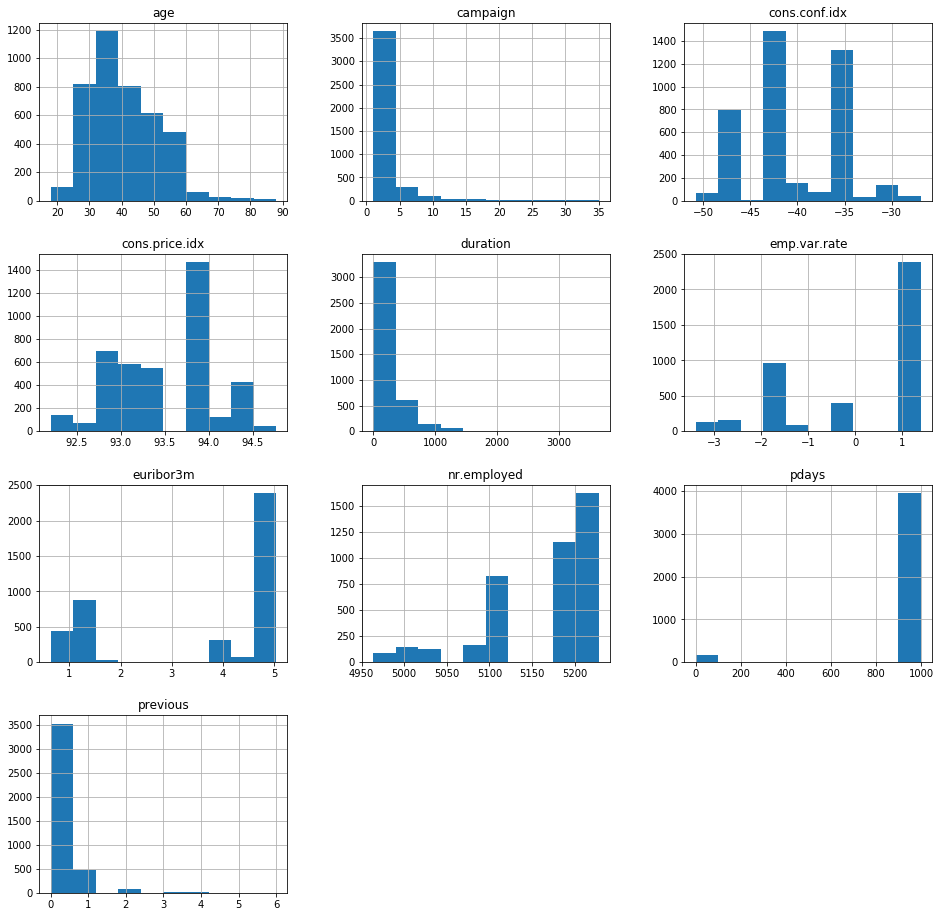

In [31]:
__ = Bank_data.hist(column=continuous_vars, figsize = (16,16))

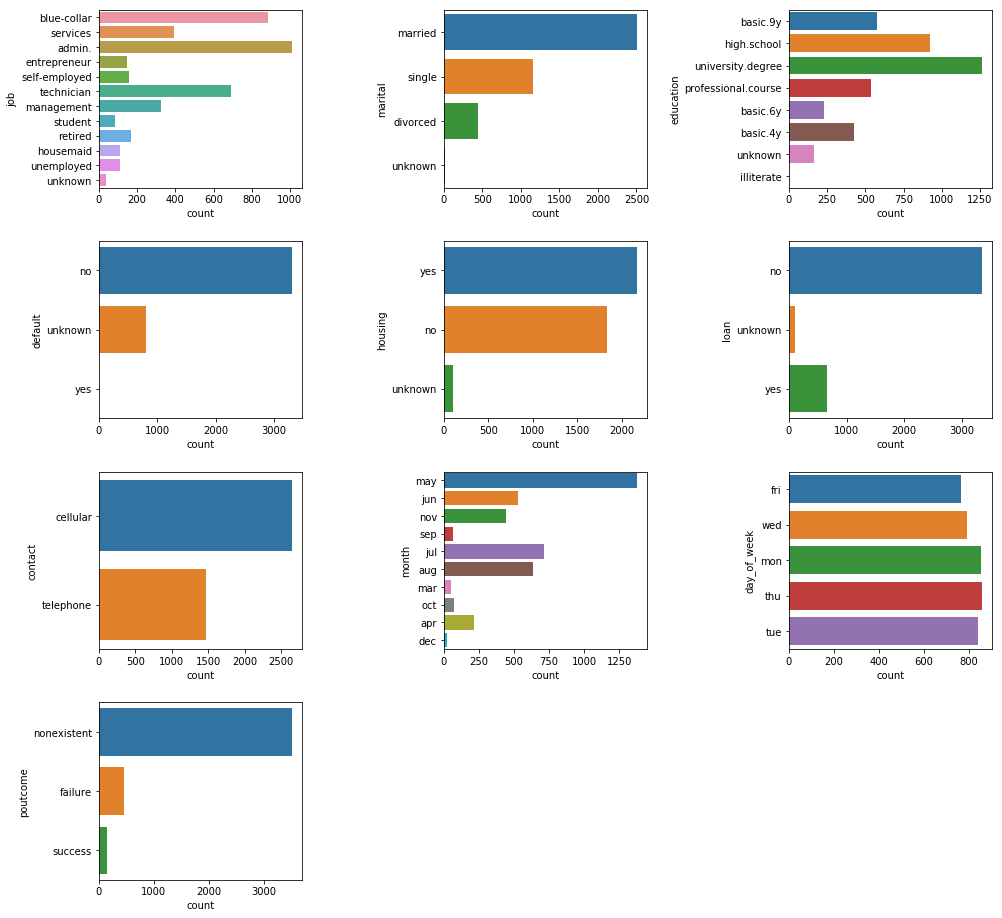

In [32]:
# Count plots of categorical variables
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=Bank_data, ax=ax)

In [33]:
#Finding unknown values in the dataset
def get_unknown_value(data, column):
    count = 0
    for row in data[column]:
        if row == 'unknown':
            count += 1
    return count

In [34]:
count_list = []
for column in Bank_data.columns[1:7]:
    unknown = get_unknown_value(Bank_data, column)
    count_list.append(unknown)
    

Text(0.5,1,'Unknown Values for Each Features')

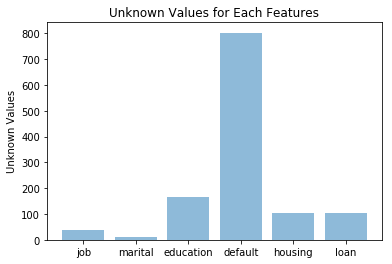

In [35]:
objects = ('job', 'marital', 'education', 'default', 'housing', 'loan')
y_pos = np.arange(len(objects))
plt.bar(y_pos, count_list, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Unknown Values')
plt.title('Unknown Values for Each Features')

In [ ]:
The unknown values for job, marital, education, default, housing and loan are shown above. 
Except for default, these are only a small part values, so we filled the unknown values
with the mode value of that specific column. The unknown value in 'default' is around 800, 
so we just dropped this feature.

In [36]:
#Replacing unknown values with most frequent values in the column
for column in Bank_data.columns[1:8]:
    Bank_data[column] = Bank_data[column].where(Bank_data[column] != 'unknown', Bank_data[column].mode()[0])

In [ ]:
After exploring the data and analyzing all the visualization, we conclude to drop the features such as 'contact', 'month','duration','default',
all other features would impact the chances of customer subscription.

In [24]:
#Split the dataset
def split_DataSet(Dataset, size):
        msk = np.random.rand(len(Dataset))<size
        Data_train = Dataset[msk]
        Data_test = Dataset[~msk]
        return Data_train,Data_test
#Normalize the columns
def normalize(x):
    return (x-min(x))/(max(x)-min(x))
#Logistic function sigma
def P(x):
    return 1.0/(1.0 + np.exp(-x))
#Logloss error
def error(y, p):
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
#Logistic regression with Gradient Ascent
def logisticregGA(x, y, xTest, yTest, beta, alpha , max_itr=1000, epsilon=1.1e-20):
    x = np.insert(x, 0, 1, axis=1)
    xTest = np.insert(xTest, 0, 1, axis=1)
    x = x * 1.0
    y = y * 1.0
    xTest = xTest * 1.0
    yTest = yTest * 1.0    
    xTranspose = x.T
    plotX = []
    plot_diff = []
    plot_loss = []
    plot_logLikelihoodTrain = []
    plot_logLikelihoodTest = []
    betaX = np.dot(beta, xTranspose)       
    logLikelihood_func = np.sum(y * betaX - np.log(1 + np.exp(betaX)))   
    for i in range(0, max_itr):        
        p = P(betaX)          
        gradient = np.dot(x.T , y - p)        
        beta = beta + (alpha * gradient)
        betaX = np.dot(beta, x.T)
        logLikelihood_func_updated = np.sum(y * betaX - np.log(1 + np.exp(betaX)))
        plot_diff.append(abs(logLikelihood_func_updated - logLikelihood_func))
        plotX.append(i)
        pTest = P(np.dot(beta, xTest.T))
        plot_loss.append(error(yTest, pTest))
        plot_logLikelihoodTrain.append(logLikelihood_func_updated)
        betaXTest = np.dot(beta, xTest.T)
        plot_logLikelihoodTest.append(np.sum(yTest * betaXTest - np.log(1 + np.exp(betaXTest))))
        if abs(logLikelihood_func_updated - logLikelihood_func) < epsilon:
            print("Converged in " + str(i) + " iterations")
            return beta, plotX, plot_diff, plotY_RMSE, lossfunction, rmse
        logLikelihood_func = logLikelihood_func_updated        
    print("Algorithm does not converge in " + str(max_itr) + " interations")
    return beta, plotX, plot_diff, plot_loss, plot_logLikelihoodTrain, plot_logLikelihoodTest
#Logistic regression with Stochastic Gradient Ascent
def logisticregSGA(xTrain, yTrain, xTest, yTest, beta, alpha, epochs = 10, epsilon=1.1e-30,
                  stepLengthController = None, stepLengthControllerParameters = None):
    xTrain = np.insert(xTrain, 0, 1, axis=1)
    xTest = np.insert(xTest, 0, 1, axis=1)
    x = xTrain * 1.0
    y = yTrain * 1.0
    xTest = xTest * 1.0
    yTest = yTest * 1.0        
    plotX = []
    plot_diff = []
    plot_loss = []
    plot_logLikelihoodTrain = []
    plot_logLikelihoodTest = []
    ind = np.arange(0, len(xTrain))    
    betaX = np.dot(beta, xTrain.T)
    logLikelihood_func = np.sum(y * betaX - np.log(1 + np.exp(betaX)))  
    logLikelihood_func_updated = logLikelihood_func    
    h = 0
    for i in range (0, epochs):        
                            
        np.random.shuffle(ind)
        #print(xTrain.shape)
        #print(yTrain.shape)
        #print(ind.size)
        for idx in ind:    
            x = xTrain[idx]
            y = yTrain[idx]
            
            betaX = np.dot(beta, x.T)          
            p = P(betaX)
            gradient = np.dot(x.T, y - p)
            #Calling Adagrad step length controller
            if stepLengthController == steplength_adagradController:
                alpha, hist = stepLengthController(gradient = gradient, h = h, **stepLengthControllerParameters)
            beta = beta + (alpha * gradient)
        plotX.append(i)
        plot_logLikelihoodTrain.append(logLikelihood_func)
        betaXTest = np.dot(beta, xTest.T)
        plot_logLikelihoodTest.append(np.sum(yTest * betaXTest - np.log(1 + np.exp(betaXTest))))
        betaX = np.dot(beta, x.T)
        logLikelihood_func = logLikelihood_func_updated
        logLikelihood_func_updated = np.sum(y * betaX - np.log(1 + np.exp(betaX)))
        plot_diff.append(abs(logLikelihood_func_updated - logLikelihood_func))
        
        pTest = P(np.dot(beta, xTest.T))
        plot_loss.append(error(yTest, pTest))
        
    #Calling Bold Driver step length controller    
    if stepLengthController == steplength_bolddriver:
            alpha = stepLengthController(fNew = logLikelihood_func_updated, alpha = alpha, fOld = logLikelihood_func, **stepLengthControllerParameters)
    return beta, plotX, plot_diff, plot_loss, plot_logLikelihoodTrain, plot_logLikelihoodTest

#Bold driver step length controller
def steplength_bolddriver(alpha, alphaPlus, alphaMinus, fNew, fOld):
    alpha = alpha * alphaPlus    
    if fNew < fOld:
        alpha = alphaPlus * alpha
    else:
        alpha = alphaMinus * alpham
    return alpha 
#Adagrad step length controller
def steplength_adagradController(alpha, gradient, h = 0, epsilon = 1.0e-12 ):
    h = h + (gradient * gradient) + epsilon
    #print(alpha)
    #print(h)
    return ((alpha * 1.0)/np.sqrt(h)), h

In [39]:
Bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
#Dropping less trivial features
Bank_data = Bank_data.drop(['contact','month','duration','default','day_of_week', 'housing', 'age', 'campaign', 'cons.conf.idx','cons.price.idx'], axis = 1)
Bank_data.shape

(4119, 11)

In [41]:
Bank_data.head(5)

,job,marital,education,loan,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,blue-collar,married,basic.9y,no,999,0,nonexistent,-1.8,1.313,5099.1,no
1,services,single,high.school,no,999,0,nonexistent,1.1,4.855,5191.0,no
2,services,married,high.school,no,999,0,nonexistent,1.4,4.962,5228.1,no
3,services,married,basic.9y,no,999,0,nonexistent,1.4,4.959,5228.1,no
4,admin.,married,university.degree,no,999,0,nonexistent,-0.1,4.191,5195.8,no


In [42]:
#Replacing the target variables with 1 and 0
Bank_data.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [43]:
#conveting non numeric fields into numeric fields
Bank_data = pd.get_dummies(Bank_data)
Bank_data.head()

,pdays,previous,emp.var.rate,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,999,0,-1.8,1.313,5099.1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,999,0,1.1,4.855,5191.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,999,0,1.4,4.962,5228.1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,999,0,1.4,4.959,5228.1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,999,0,-0.1,4.191,5195.8,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [44]:
Bank_data.describe()

,pdays,previous,emp.var.rate,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,960.422190,0.190337,0.084972,3.621356,5166.481695,0.109493,0.255159,0.214615,0.035931,0.026706,...,0.139354,0.223598,0.000243,0.129886,0.347414,0.838553,0.161447,0.110221,0.855305,0.034474
std,191.922786,0.541788,1.563114,1.733591,73.667904,0.312294,0.436003,0.410605,0.186141,0.161241,...,0.346358,0.416706,0.015581,0.336219,0.476207,0.367987,0.367987,0.313203,0.351836,0.182466
min,0.000000,0.000000,-3.400000,0.635000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.000000,0.000000,-1.800000,1.334000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,999.000000,0.000000,1.100000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,999.000000,0.000000,1.400000,4.961000,5228.100000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,999.000000,6.000000,1.400000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#Normalisation
Bank_data['nr.employed'] = normalize(Bank_data['nr.employed'])
Bank_data['pdays'] = normalize(Bank_data['pdays'])

In [46]:
Bank_data.head(5)

,pdays,previous,emp.var.rate,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0,-1.8,1.313,0.512287,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,1.0,0,1.1,4.855,0.859735,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.0,0,1.4,4.962,1.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1.0,0,1.4,4.959,1.000000,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1.0,0,-0.1,4.191,0.877883,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [47]:
#Splitting dataset into train and test data
x_Train, x_Test = split_DataSet(Bank_data, 0.8)
y_Train = x_Train['y']
x_Train = x_Train.drop('y', axis = 1)
y_Test = x_Test['y']
x_Test = x_Test.drop('y', axis = 1)
print("Training data size " + str(x_Train.shape))
print("Training data size "+ str(x_Test.shape))

Training data size (3283, 31)
Training data size (836, 31)


In [96]:
#Gradient Ascent
beta, xAxis, functionDifference, logLossTest, logLikelihoodTrain, logLikelihoodTest = logisticregGA(x_Train.as_matrix(), y_Train.as_matrix(),
                                                     x_Test.as_matrix(), y_Test.as_matrix(), 
                                                     np.zeros(x_Train.shape[1] + 1) , 1e-5)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Algorithm does not converge in 1000 interations


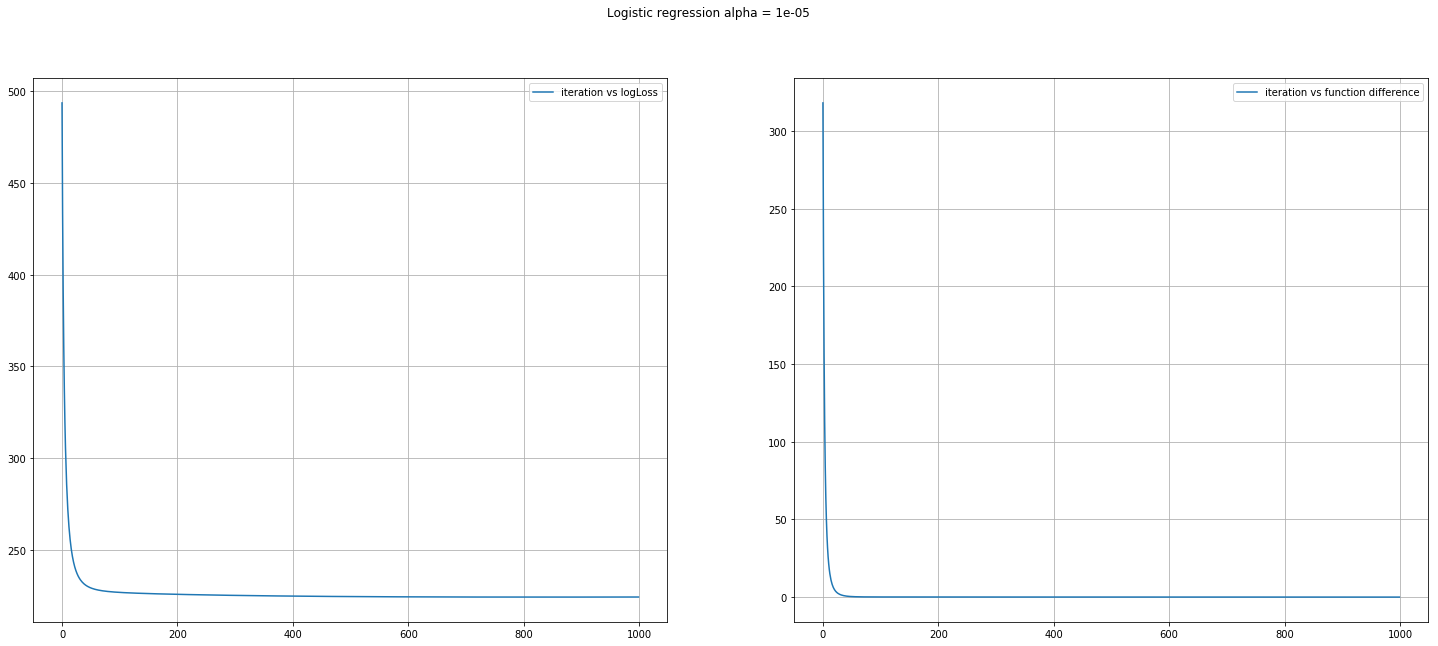

In [101]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis, logLossTest, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis, functionDifference, label = "iteration vs function difference")
fig2.grid()
fig2.legend()

plt.show()

In [102]:
#SGA
beta1, xAxis1, functionDifference1, logLossTest1, logLikelihoodTrain1, logLikelihoodTest1 = logisticregSGA(x_Train.as_matrix(), 
                                                                                                                   y_Train.as_matrix(), x_Test.as_matrix(), 
                                                                                                                   y_Test.as_matrix(), 
                                                                                                                   np.zeros(x_Train.shape[1] + 1), 5.5e-4, 1000)


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


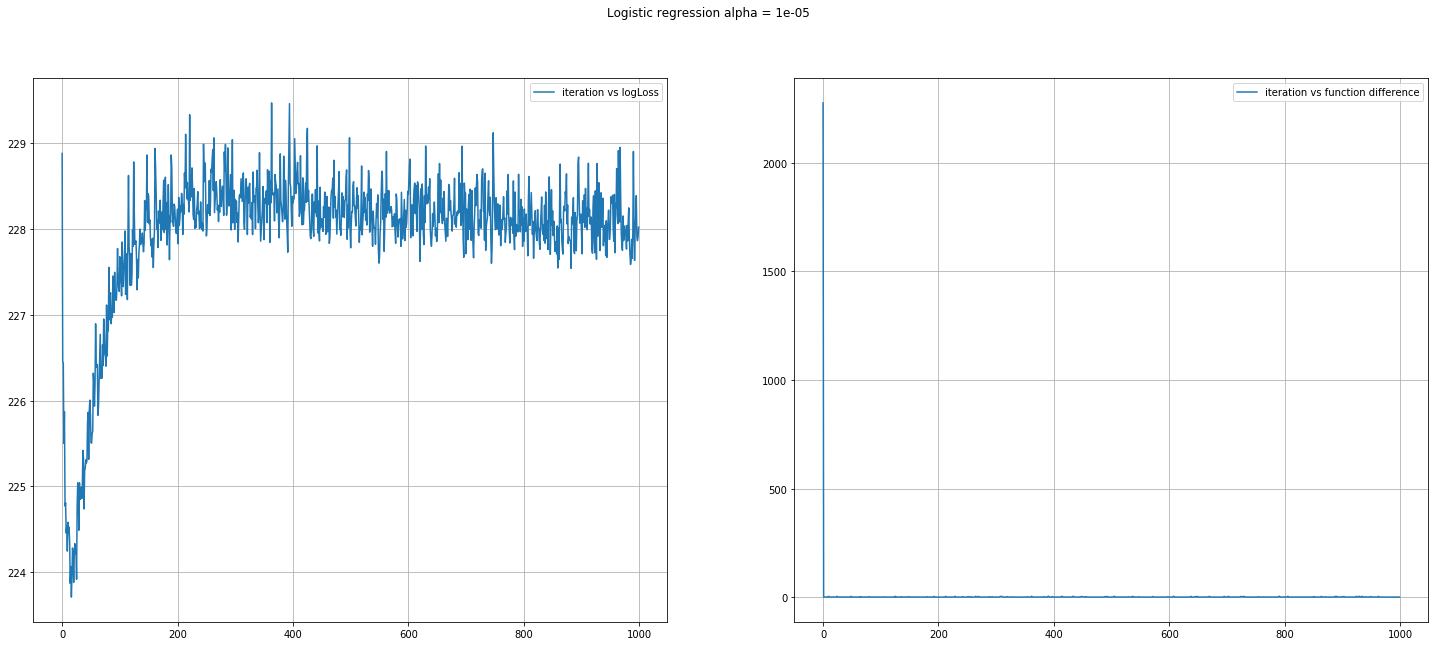

In [103]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis1, logLossTest1, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis1, functionDifference1, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [105]:
#SGA with Bold Driver
beta2, xAxis2, functionDifference2, logLossTest2, logLikelihoodTrain2, logLikelihoodTest2 = logisticregSGA(x_Train.as_matrix(), 
                                                                                                                   y_Train.as_matrix(), x_Test.as_matrix(), 
                                                                                                                   y_Test.as_matrix(), 
                                                                                                                   np.zeros(x_Train.shape[1] + 1), 1e-5, 200,
                                                                                                                   stepLengthController = steplength_bolddriver,
                                                                                                                   stepLengthControllerParameters = {"alphaMinus" : 0.999, "alphaPlus" : 1.001})

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


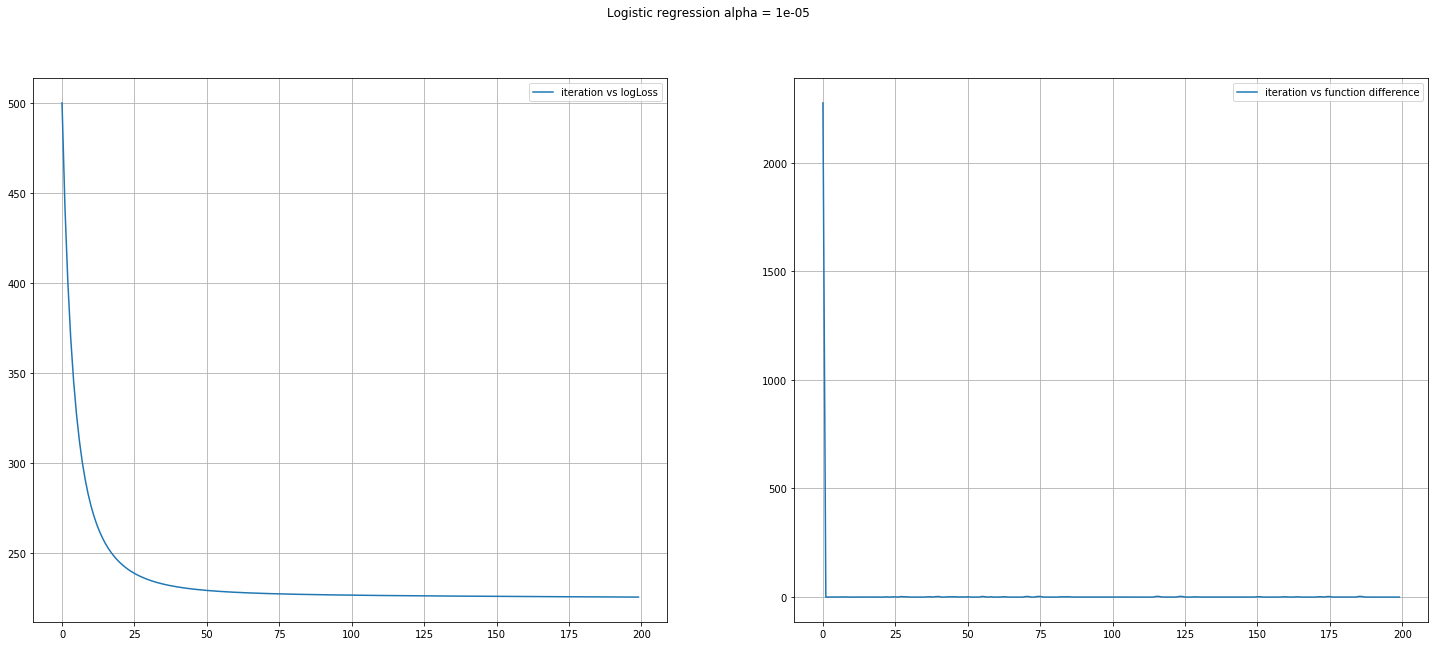

In [107]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis2, logLossTest2, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis2, functionDifference2, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [108]:
#SGA with Adagrad
beta3, xAxis3, functionDifference3, logLossTest3, logLikelihoodTrain3, logLikelihoodTest3 = logisticregSGA(x_Train.as_matrix(), 
                                                                                                                   y_Train.as_matrix(), x_Test.as_matrix(), 
                                                                                                                   y_Test.as_matrix(), 
                                                                                                                   np.zeros(x_Train.shape[1] + 1), 1e-5, 200,
                                                                                                                   stepLengthController = steplength_adagradController,
                                                                                                                   stepLengthControllerParameters = {"alpha":0.1e-3})

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


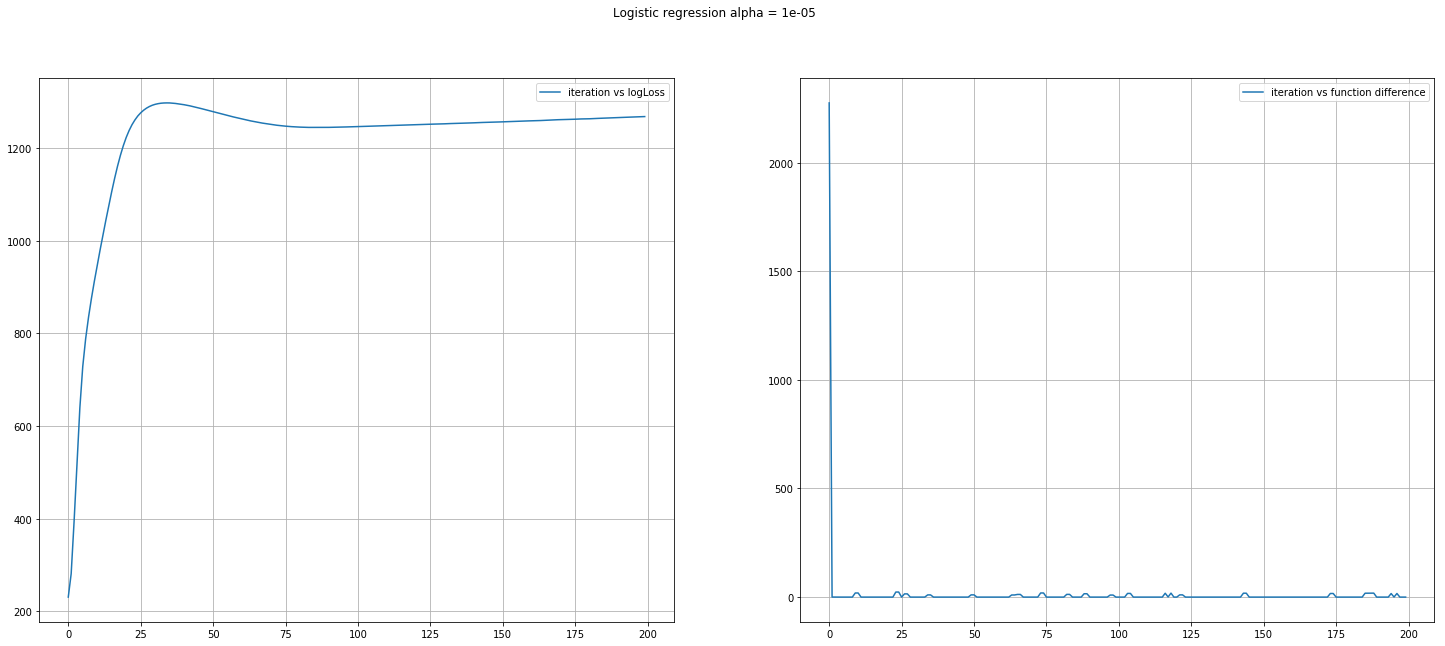

In [110]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis3, logLossTest3, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis3, functionDifference3, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [74]:
#Data preprocessing for Occupancy Detection dataset
data1 = pd.read_csv("datatraining.txt", sep=',')
data2 = pd.read_csv("datatest.txt", sep=',')
data3 = pd.read_csv("datatest2.txt", sep=',')

occupancy_Data = pd.concat([data1, data2, data3])
occupancy_Data.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [75]:
occupancy_Data.dropna(inplace = True)

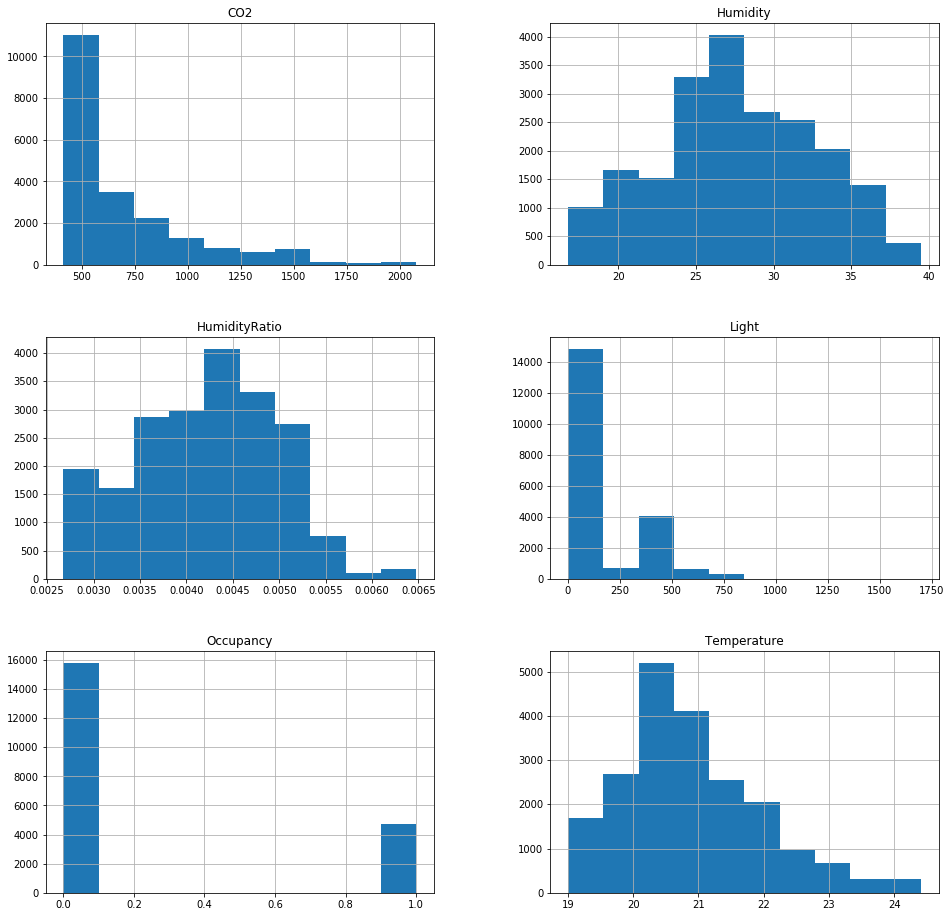

In [76]:
#Plotting the occurance of each feature
__ = occupancy_Data.hist(column=occupancy_Data.columns, figsize = (16,16))

In [77]:
#Normalising the data
occupancy_Data['Temperature'] = normalize(occupancy_Data['Temperature'])
occupancy_Data['Humidity'] = normalize(occupancy_Data['Humidity'])
occupancy_Data['Light'] = normalize(occupancy_Data['Light'])
occupancy_Data['CO2'] = normalize(occupancy_Data['CO2'])

In [78]:
#Dropping less trivial feature
occupancy_Data = occupancy_Data.drop(['date'], axis = 1)
occupancy_Data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,0.772881,0.462624,0.250994,0.185424,0.004793,1
2,0.767334,0.462426,0.253056,0.181067,0.004783,1
3,0.767334,0.461437,0.250994,0.180766,0.004779,1
4,0.767334,0.459459,0.250994,0.177611,0.004772,1
5,0.758089,0.459459,0.250994,0.175357,0.004757,1


In [111]:
#Splitting the dataset
x_Train1, x_Test1 = split_DataSet(occupancy_Data, 0.8)
y_Train1 = x_Train1['Occupancy']
x_Train1 = x_Train1.drop('Occupancy', axis = 1)
y_Test1 = x_Test1['Occupancy']
x_Test1 = x_Test1.drop('Occupancy', axis = 1)
print("Training data size " + str(x_Train1.shape))
print("Training data size "+ str(x_Test1.shape))

Training data size (16393, 5)
Training data size (4167, 5)


In [112]:
#Gradient Ascent
beta, xAxis, functionDifference, logLossTest, logLikelihoodTrain, logLikelihoodTest = logisticregGA(x_Train1.as_matrix(), y_Train1.as_matrix(),
                                                     x_Test1.as_matrix(), y_Test1.as_matrix(), 
                                                     np.zeros(x_Train1.shape[1] + 1) , 1e-5)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Algorithm does not converge in 1000 interations


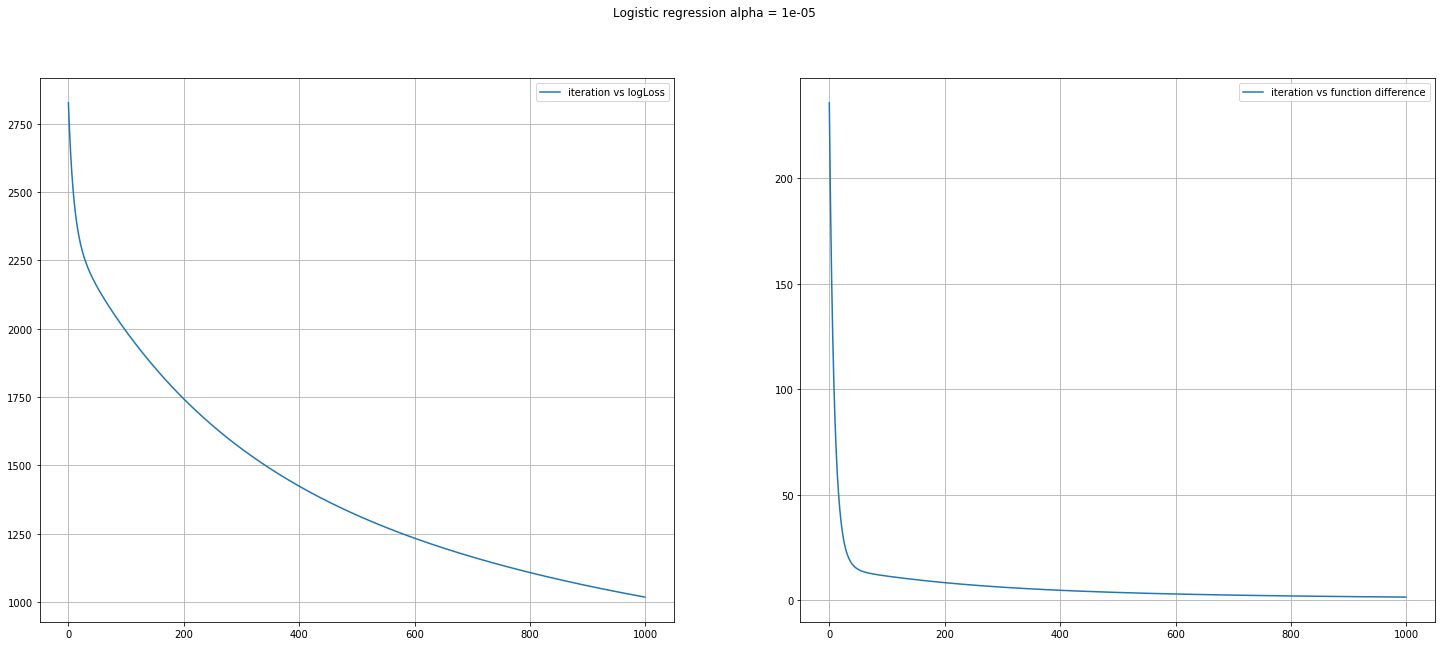

In [115]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis, logLossTest, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis, functionDifference, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [116]:
#StochasticGradientAscent
beta1, xAxis1, functionDifference1, logLossTest1, logLikelihoodTrain1, logLikelihoodTest1 = logisticregSGA(x_Train1.as_matrix(), 
                                                                                                                   y_Train1.as_matrix(), x_Test1.as_matrix(), 
                                                                                                                   y_Test1.as_matrix(), 
                                                                                                                   np.zeros(x_Train1.shape[1] + 1), 5.5e-4, 100)


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


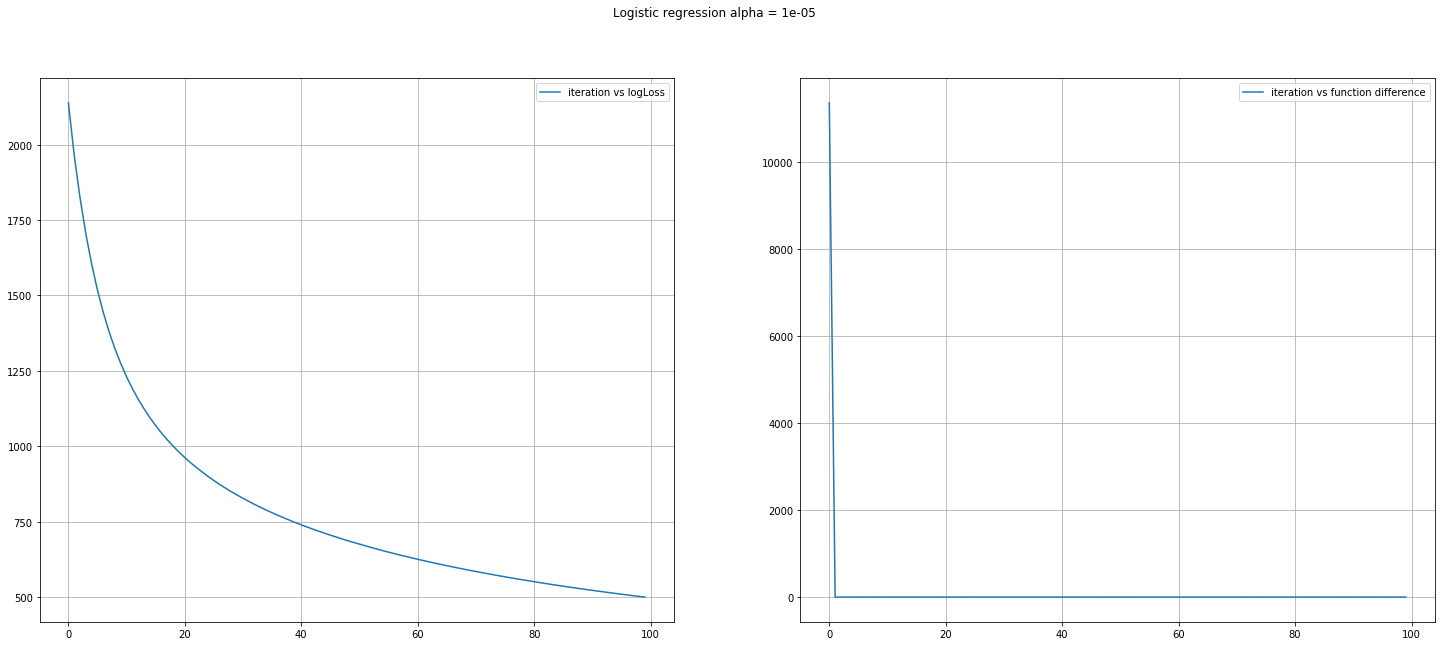

In [117]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis1, logLossTest1, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis1, functionDifference1, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [118]:
#SGA with BD steplength
beta2, xAxis2, functionDifference2, logLossTest2, logLikelihoodTrain2, logLikelihoodTest2 = logisticregSGA(x_Train1.as_matrix(), 
                                                                                                                   y_Train1.as_matrix(), x_Test1.as_matrix(), 
                                                                                                                   y_Test1.as_matrix(), 
                                                                                                                   np.zeros(x_Train1.shape[1] + 1), 1e-5, 200,
                                                                                                                   stepLengthController = steplength_bolddriver,
                                                                                                                   stepLengthControllerParameters = {"alphaMinus" : 0.999, "alphaPlus" : 1.001})

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


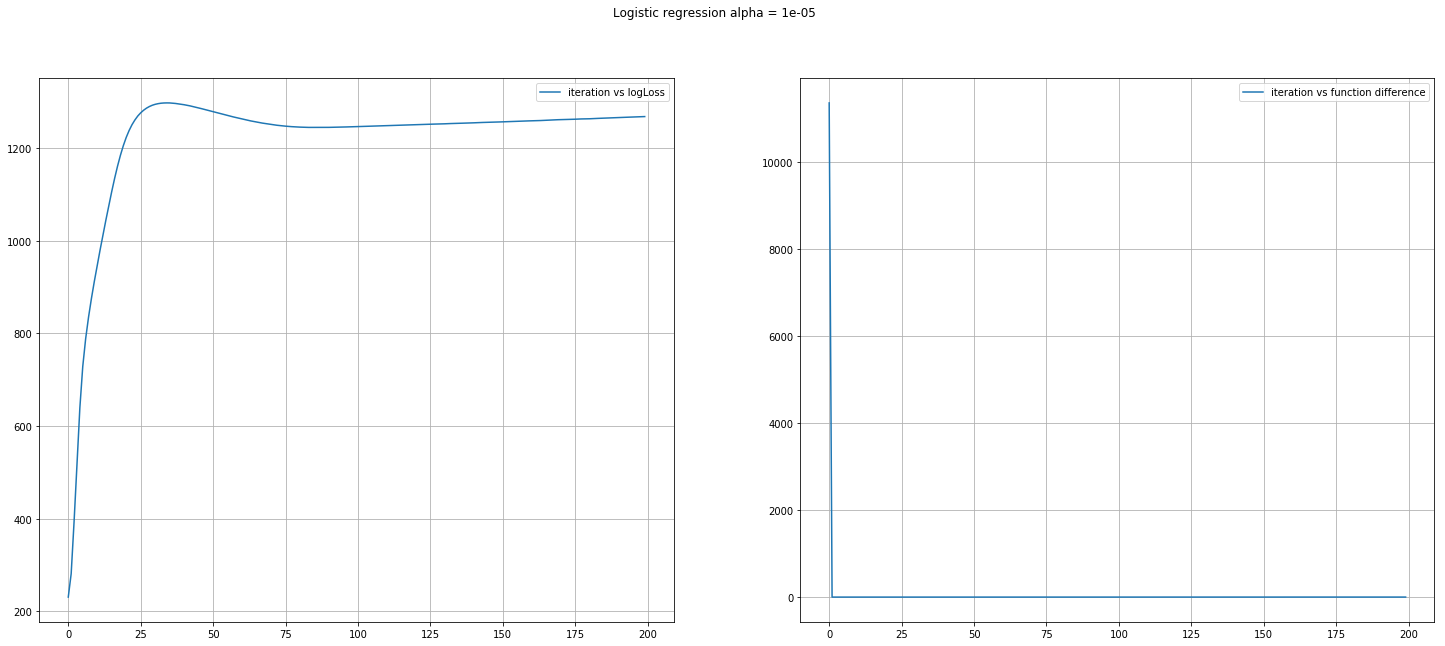

In [119]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis2, logLossTest3, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis2, functionDifference2, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()

In [120]:
#SGA with Adagrad steplength
beta3, xAxis3, functionDifference3, logLossTest3, logLikelihoodTrain3, logLikelihoodTest3 = logisticregSGA(x_Train.as_matrix(), 
                                                                                                                   y_Train.as_matrix(), x_Test.as_matrix(), 
                                                                                                                   y_Test.as_matrix(), 
                                                                                                                   np.zeros(x_Train.shape[1] + 1), 1e-5, 200,
                                                                                                                   stepLengthController = steplength_adagradController,
                                                                                                                   stepLengthControllerParameters = {"alpha":0.1e-3})

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


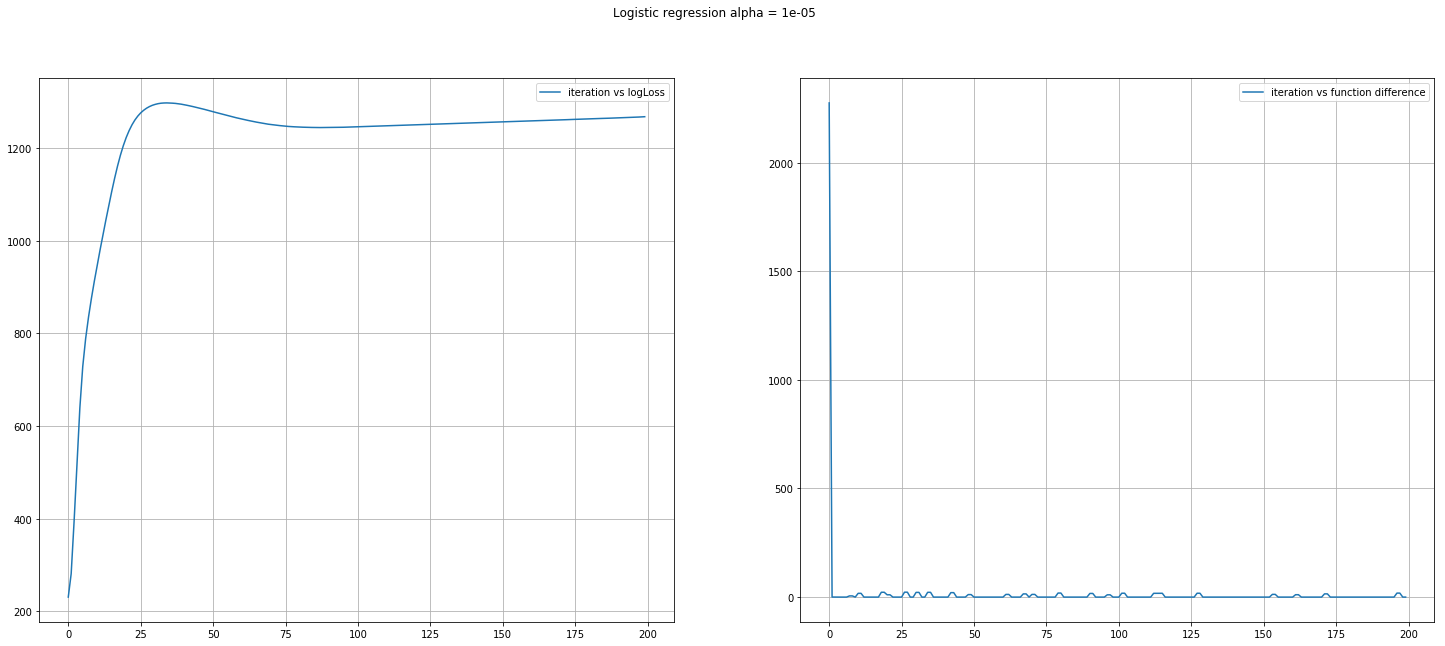

In [121]:
figure, ((fig1, fig2)) = plt.subplots(1, 2, figsize=(25, 10))
plt.suptitle("Logistic regression alpha = " + str(1e-5))
fig1.plot(xAxis3, logLossTest3, label = "iteration vs logLoss")
fig1.grid()
fig1.legend()
fig2.plot(xAxis3, functionDifference3, label = "iteration vs function difference")
fig2.grid()
fig2.legend()
plt.show()